# Project Phase 1: Data Pre-processing & EDA
**Notebook 1 of 2**

## Team Outliers
1. Karan Dalal
2. Neil Joshi
3. Syed Kashif Kamonpuri
4. Vishal Agarwal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Online Retail.xlsx', date_parser='InvoiceDate')
data.StockCode = data.StockCode.astype('str')
data.shape

(541909, 8)

In [3]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Checking for missing values

In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Checking number of rows per Country

In [6]:
data.groupby('Country').size()

Country
Australia                 1259
Austria                    401
Bahrain                     19
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      8196
European Community          61
Finland                    695
France                    8557
Germany                   9495
Greece                     146
Hong Kong                  288
Iceland                    182
Israel                     297
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1519
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533


### Grouping rows by Invoice

In [9]:
data.groupby('InvoiceNo').sum()

,Quantity,UnitPrice,CustomerID
InvoiceNo,,,
536365,40,27.37,124950.0
536366,12,3.70,35700.0
536367,83,58.24,156564.0
536368,15,19.10,52188.0
536369,3,5.95,13047.0
...,...,...,...
C581484,-80995,2.08,16446.0
C581490,-23,2.78,28794.0
C581499,-1,224.69,15498.0


### Removing duplicate rows

In [11]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(536641, 8)

### Removing records with negative quantity

In [12]:
data = data[data.Quantity > 0]
data.shape

(526054, 8)

### Removing records with negative unit price

In [13]:
data = data[data.UnitPrice > 0]
data.shape

(524878, 8)

### Calculating TotalSalesAmount
TotalSalesAmount = UnitPrice $\times$ Quantity

In [14]:
data['TotalSalesAmount'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Identifying and fixing items with multiple Descriptions
* We found many stock codes with multiple descriptions. To standardize the dataset, we replaced the multiple descriptions of a stock code with the description with highest occurence
* We also imputed rows with missing descriptions, with the the description of corresponding stock code

In [15]:
def max_count(descriptions):
    count_df = data[data.Description.isin(descriptions)]
    count_df = pd.DataFrame(count_df.groupby('Description').size())
    count_df.columns = ['Count']
    count_df.sort_values(by='Count', ascending=False)
    count_df.reset_index(inplace=True)
    return count_df.loc[0, 'Description']

In [16]:
stock_df = pd.DataFrame(data.groupby(['StockCode', 'Description']).size())
stock_df.reset_index(inplace=True)
stock_df.sort_values('StockCode')

,StockCode,Description,0
0,10002,INFLATABLE POLITICAL GLOBE,71
1,10080,GROOVY CACTUS INFLATABLE,22
2,10120,DOGGY RUBBER,29
3,10123C,HEARTS WRAPPING TAPE,3
4,10124A,SPOTS ON RED BOOKCOVER TAPE,5
...,...,...,...
4156,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,9
4157,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,7
4158,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,3
4159,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,4


### Stock codes with multiple descriptions

In [17]:
stock_df = pd.DataFrame(stock_df.groupby('StockCode').size())
stock_df.columns = ["Count"]
stock_df.reset_index(inplace=True)
stock_df = stock_df[stock_df.Count > 1]
stock_df

,StockCode,Count
46,16156L,2
104,17107D,3
123,20622,2
175,20725,2
270,20914,2
...,...,...
3475,85184C,2
3477,85185B,2
3548,90014A,2
3549,90014B,2


In [18]:
for code in stock_df.StockCode:
    descriptions = list(data[data.StockCode == code].Description.unique())
    new_desc = max_count(descriptions)
    data.loc[data.StockCode == code, 'Description'] = new_desc

In [19]:
data.StockCode.nunique()

3922

In [20]:
data.groupby('StockCode').sum().sort_values('TotalSalesAmount', ascending=False)

,Quantity,UnitPrice,CustomerID,TotalSalesAmount
StockCode,,,,
DOT,706,206248.770,225536.0,206248.770
22423,13851,28065.760,25637419.0,174156.540
23843,80995,2.080,16446.0,168469.600
85123A,37641,7024.490,31482068.0,104462.750
47566,18283,9850.680,21362286.0,99445.230
...,...,...,...,...
90084,1,0.850,14701.0,0.850
21268,2,0.420,15574.0,0.840
51014c,1,0.830,0.0,0.830


In [21]:
data.groupby('StockCode').sum().sort_values('Quantity', ascending=False)

,Quantity,UnitPrice,CustomerID,TotalSalesAmount
StockCode,,,,
23843,80995,2.08,16446.0,168469.60
23166,78033,367.12,3047321.0,81700.92
22197,56898,1479.76,16366320.0,51334.47
84077,54951,171.91,7213288.0,13814.01
85099B,48371,5243.39,24700699.0,94159.81
...,...,...,...,...
90181C,1,9.15,0.0,9.15
51014c,1,0.83,0.0,0.83
47591b,1,4.13,0.0,4.13


### Checking for missing values after imputing Description

In [23]:
data.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          132186
Country                  0
TotalSalesAmount         0
dtype: int64

In [24]:
country_df = pd.DataFrame(data.groupby(['InvoiceNo', 'Country']).size())
country_df.columns = ['Count']
country_df.reset_index(inplace=True)
country_df.drop(columns='Count')

,InvoiceNo,Country
0,536365,United Kingdom
1,536366,United Kingdom
2,536367,United Kingdom
3,536368,United Kingdom
4,536369,United Kingdom
...,...,...
19955,581584,United Kingdom
19956,581585,United Kingdom
19957,581586,United Kingdom
19958,581587,France


# Number of Invoices for each country

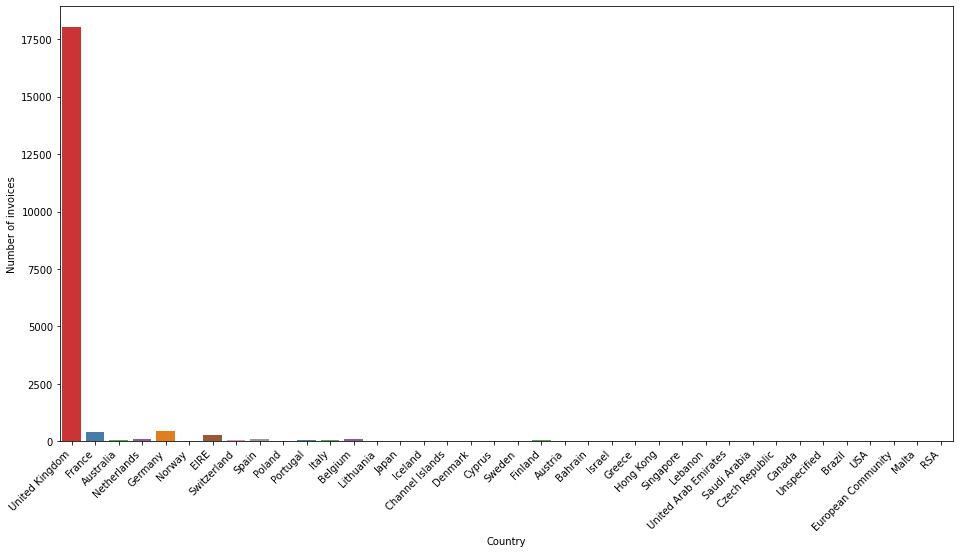

In [25]:
plt.figure(figsize=(16,8))

chart = sns.countplot(
    data=country_df,
    x='Country',
    palette='Set1',
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Number of invoices')
plt.show()

# Identifying outliers: Total Sales Amount distribution for each country

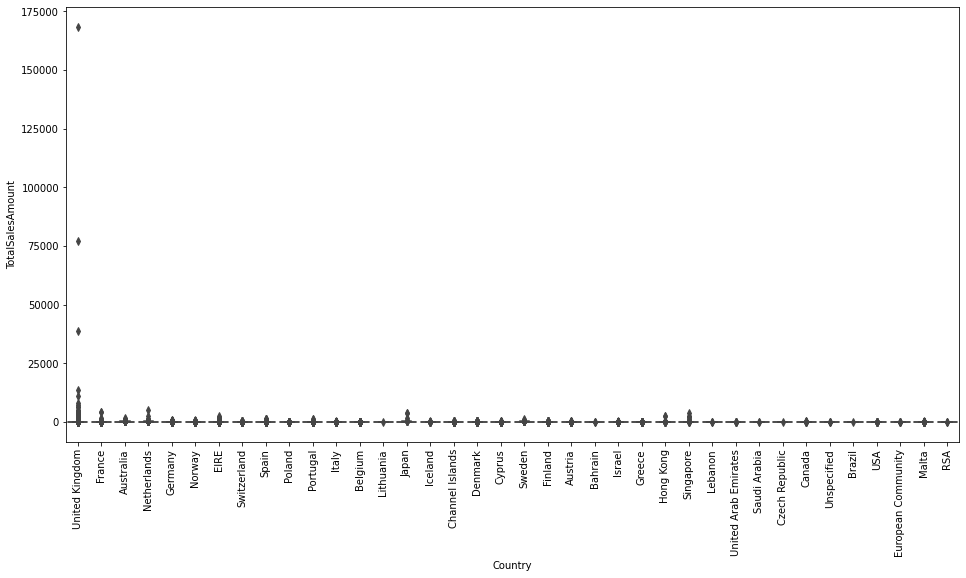

In [26]:
plt.figure(figsize=(16,8))

ax = sns.boxplot(x="Country", y="TotalSalesAmount", data=data)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.ylabel('Number of invoices')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# Identifying outliers: Distribution of unit price

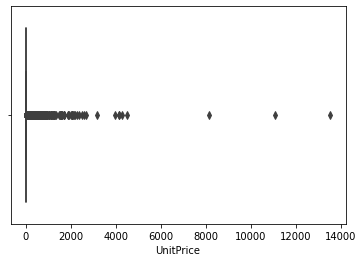

In [27]:
sns.boxplot(data.UnitPrice)

# Identifying outliers: Distribution of quantity sold for each item for all transactions

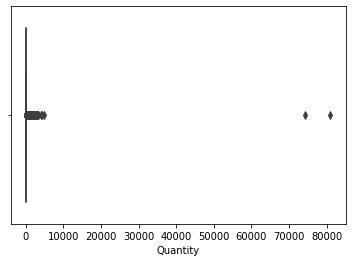

In [28]:
sns.boxplot(data.Quantity)

# Identifying outliers: Distribution of total sales amount

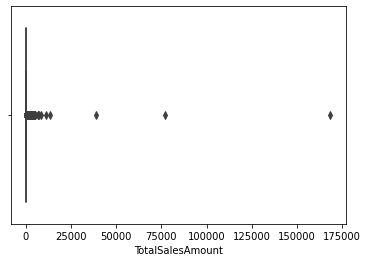

In [29]:
sns.boxplot(data.TotalSalesAmount)

In [30]:
data.describe()

,Quantity,UnitPrice,CustomerID,TotalSalesAmount
count,524878.000000,524878.000000,392692.000000,524878.000000
mean,10.616600,3.922573,15287.843865,20.275399
std,156.280031,36.093028,1713.539549,271.693566
min,1.000000,0.001000,12346.000000,0.001000
25%,1.000000,1.250000,13955.000000,3.900000
50%,4.000000,2.080000,15150.000000,9.920000
75%,11.000000,4.130000,16791.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


# Q1: Top 10 customers by total sales amount

In [35]:
data.groupby('CustomerID').sum().sort_values('TotalSalesAmount', ascending=False).head(10)

,Quantity,UnitPrice,TotalSalesAmount
CustomerID,,,
14646.0,196915,5176.09,280206.02
18102.0,64124,1940.92,259657.30
17450.0,69973,1135.32,194390.79
16446.0,80997,4.98,168472.50
14911.0,80240,26150.35,143711.17
12415.0,77374,2097.08,124914.53
14156.0,57768,5348.73,117210.08
17511.0,64549,2221.28,91062.38
16029.0,40108,8720.65,80850.84


# Q2: Top 10 transactions (incoice no) by total sales amount

In [36]:
data.groupby('InvoiceNo').sum().sort_values('TotalSalesAmount', ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,TotalSalesAmount
InvoiceNo,,,,
581483,80995,2.08,16446.0,168469.60
541431,74215,1.04,12346.0,77183.60
574941,14149,498.89,0.0,52940.94
576365,13956,469.51,0.0,50653.91
556444,60,649.50,15098.0,38970.00
567423,12572,36.77,209400.0,31698.16
556917,15049,283.57,1713270.0,22775.93
572209,1920,86.50,126714.0,22206.00
567381,6760,42.60,209400.0,22104.80


In [37]:
data['InvoiceMonth'] = data.InvoiceDate.dt.month.astype(str) + '-' + data.InvoiceDate.dt.year.astype('str')
data.InvoiceMonth = pd.to_datetime(data.InvoiceMonth)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSalesAmount,InvoiceMonth
0,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


# Q3: Total sales amount trend from Dec-2010 to Dec-2012

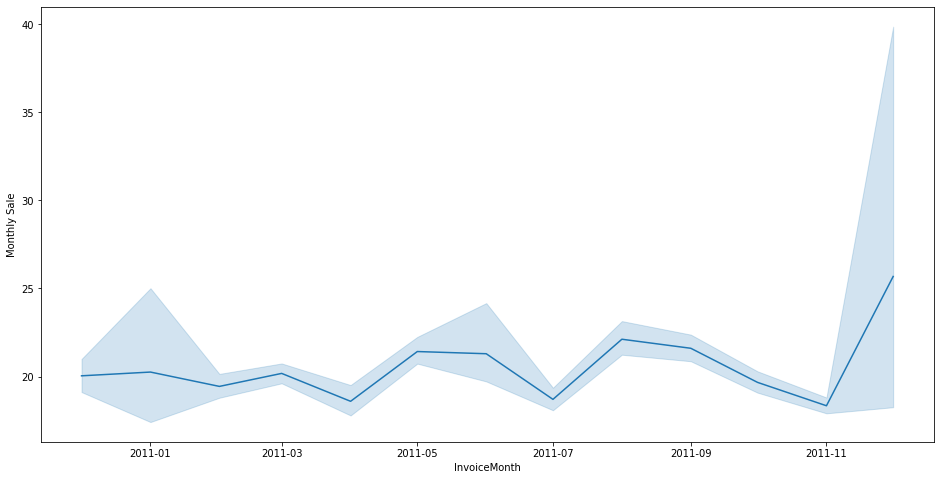

In [38]:
plt.figure(figsize=(16,8))
sns.lineplot(x='InvoiceMonth', y='TotalSalesAmount', data=data)
plt.ylabel('Monthly Sale')
plt.show()

# Q4: Average sales for each product

In [39]:
data.groupby(['StockCode', 'Description']).mean().sort_values('Quantity', ascending=False)

,,Quantity,UnitPrice,CustomerID,TotalSalesAmount
StockCode,Description,,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995.000000,2.080000,16446.000000,168469.600000
47556B,TEA TIME TEA TOWELS,1300.000000,2.325000,15749.000000,3022.500000
23166,MEDIUM CERAMIC TOP STORAGE JAR,312.132000,1.468480,15390.510101,326.803680
16014,SMALL CHINESE STYLE SCISSOR,246.814815,0.401481,15447.537037,80.291852
16033,MINI HIGHLIGHTER PENS,210.000000,0.120000,16987.750000,25.200000
...,...,...,...,...,...
22528,GARDENERS KNEELING PAD,1.000000,3.360000,NaN,3.360000
23574,PACKING CHARGE,1.000000,7.500000,15409.000000,7.500000
85184c,SET 4 VALENTINE DECOUPAGE HEART BOX,1.000000,5.790000,NaN,5.790000


# Q5: Top 10 products by Total Sales Amount

In [40]:
data.groupby(['StockCode', 'Description']).sum().sort_values('TotalSalesAmount', ascending=False).head(10)

,,Quantity,UnitPrice,CustomerID,TotalSalesAmount
StockCode,Description,,,,
DOT,DOTCOM POSTAGE,706,206248.77,225536.0,206248.77
22423,REGENCY CAKESTAND 3 TIER,13851,28065.76,25637419.0,174156.54
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
85123A,CREAM HANGING HEART T-LIGHT HOLDER,37641,7024.49,31482068.0,104462.75
47566,PARTY BUNTING,18283,9850.68,21362286.0,99445.23
85099B,JUMBO BAG RED RETROSPOT,48371,5243.39,24700699.0,94159.81
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033,367.12,3047321.0,81700.92
POST,POSTAGE,3150,34992.23,14015033.0,78101.88
M,Manual,6984,74098.73,4302563.0,77750.27


# Q6: Top 10 products by Quantity sold

In [41]:
data.groupby(['StockCode', 'Description']).sum().sort_values('Quantity', ascending=False).head(10)

,,Quantity,UnitPrice,CustomerID,TotalSalesAmount
StockCode,Description,,,,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033,367.12,3047321.0,81700.92
22197,POPCORN HOLDER,56898,1479.76,16366320.0,51334.47
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54951,171.91,7213288.0,13814.01
85099B,JUMBO BAG RED RETROSPOT,48371,5243.39,24700699.0,94159.81
85123A,CREAM HANGING HEART T-LIGHT HOLDER,37641,7024.49,31482068.0,104462.75
21212,PACK OF 72 RETROSPOT CAKE CASES,36396,1029.15,15848883.0,21246.45
84879,ASSORTED COLOUR BIRD ORNAMENT,36362,2542.52,21247829.0,58927.62
23084,RABBIT NIGHT LIGHT,30739,2426.97,12264242.0,66870.03


In [42]:
data = data.loc[data.Country == 'United Kingdom']
data.shape

(479985, 10)

In [43]:
data['Num_Item'] = 1
df = data.groupby('InvoiceNo').sum()
df

,Quantity,UnitPrice,CustomerID,TotalSalesAmount,Num_Item
InvoiceNo,,,,,
536365,40,27.37,124950.0,139.12,7
536366,12,3.70,35700.0,22.20,2
536367,83,58.24,156564.0,278.73,12
536368,15,19.10,52188.0,70.05,4
536369,3,5.95,13047.0,17.85,1
...,...,...,...,...,...
581583,76,3.30,27554.0,124.60,2
581584,120,2.57,27554.0,140.64,2
581585,278,37.78,331884.0,329.05,21


### Removing invoices with high number of items (90 percentile)

In [44]:
wanted_invoice = list(df[df.Num_Item <= np.percentile(df.Num_Item, 90)].index)

data = data.loc[data.InvoiceNo.isin(wanted_invoice)]
data.shape

(258270, 11)

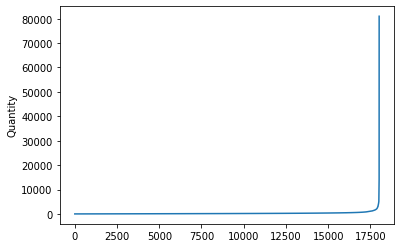

In [45]:
df.sort_values(by='Quantity', inplace=True)

sns.lineplot(list(range(df.shape[0])), y=df.Quantity)

### Converting Description column to lower-case

In [46]:
data['Description'] = data.Description.str.lower()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSalesAmount,InvoiceMonth,Num_Item
0,536365,85123A,cream hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,1
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,1
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,1
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,1
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,1


In [47]:
data.drop(columns='Num_Item', inplace=True)

### Removing unwanted items

In [48]:
data = data.loc[~data.Description.str.contains('postage')]
data = data.loc[~data.Description.str.contains('manual')]
data = data.loc[~data.Description.str.contains('amazon')]
data = data.loc[~data.Description.str.contains('charges')]

data.shape

(257800, 10)

### Removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb81bd37310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb81bd37d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb81bd30d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb81be80890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb81be80dd0>],
 'means': []}

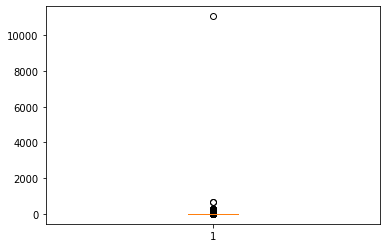

In [49]:
plt.boxplot(data.UnitPrice)

In [50]:
data = data.loc[data.UnitPrice < 6000]
data.shape

(257799, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8331b8e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb83323dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8331a4f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb8350cd310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb843297990>],
 'means': []}

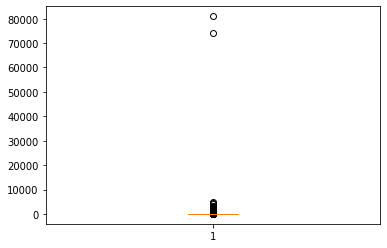

In [51]:
plt.boxplot(data.Quantity)

In [52]:
data = data.loc[data.Quantity < 60000]
data.shape

(257797, 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb837a3d250>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb837a5dbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8350e2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb837a643d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb837a64b50>],
 'means': []}

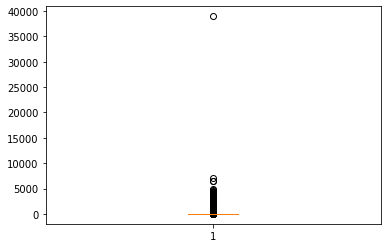

In [53]:
plt.boxplot(data.TotalSalesAmount)

In [54]:
data = data.loc[data.TotalSalesAmount < 35000]
data.shape

(257796, 10)

### Visualizing top-selling items along with Unit Price

In [56]:
top_item = pd.DataFrame(data.groupby(['StockCode', 'Description']).size())
top_item.columns = ['Count']
top_item.sort_values(by='Count', ascending=False, inplace=True)
top_item.reset_index(inplace=True)
#top_item = top_item.loc[:, ['StockCode', 'Description', 'Quantity']]
#top_item.head(10)

price = data.groupby(['StockCode', 'Description']).mean()
top_item = top_item.merge(price, on=['StockCode', 'Description'], how='left')
top_item = top_item.loc[:, ['StockCode', 'Description', 'Count', 'UnitPrice']]
top_item = top_item.loc[:10,]
top_item.set_index('Description', drop=True, inplace=True)
top_item

,StockCode,Count,UnitPrice
Description,,,
cream hanging heart t-light holder,85123A,1559,2.872938
jumbo bag red retrospot,85099B,1352,2.216620
regency cakestand 3 tier,22423,1219,12.482912
party bunting,47566,1138,4.927671
assorted colour bird ornament,84879,1129,1.684446
lunch bag red retrospot,20725,887,1.726246
set of 3 cake tins pantry design,22720,820,5.026598
jumbo bag doiley patterns,23203,815,2.052086
jumbo bag pink polkadot,22386,801,2.364657


In [57]:
new_idx=[]
for index in top_item.index:
    desc = index.split(' ')
    if len(desc) > 3:
        desc = ' '.join(desc[:3]) + '\n' + ' '.join(desc[3:])
    elif len(desc) > 2:
        desc = ' '.join(desc[:2]) + '\n' + ' '.join(desc[2:])
    else:
        desc = ' '.join(desc)
    new_idx.append(desc)
    
top_item.index = new_idx

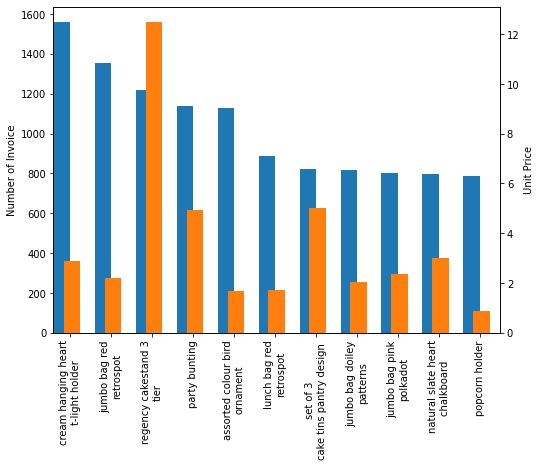

In [66]:
fig = plt.figure(figsize=(8,6)) 

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

width = 0.4

top_item.Count.plot(kind='bar', color='#1f77b4', ax=ax, width=width, position=1)
top_item.UnitPrice.plot(kind='bar', color='#ff7f0e', ax=ax2, width=width, position=0.4)

ax.set_ylabel('Number of Invoice')
ax2.set_ylabel('Unit Price')

plt.show()

### Items with high total sales amount

In [59]:
totalSales = data.groupby(['Description']).sum()
totalSales.sort_values(by='TotalSalesAmount', ascending=False, inplace=True)
totalSales = totalSales.iloc[:10,]

new_idx=[]
for index in totalSales.index:
    desc = index.split(' ')
    if len(desc) > 3:
        desc = ' '.join(desc[:3]) + '\n' + ' '.join(desc[3:])
    elif len(desc) > 2:
        desc = ' '.join(desc[:2]) + '\n' + ' '.join(desc[2:])
    else:
        desc = ' '.join(desc)
    new_idx.append(desc)
    
totalSales.index = new_idx

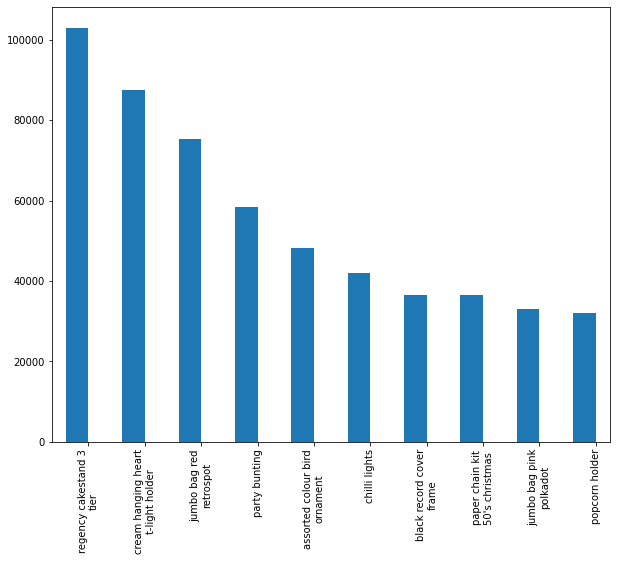

In [60]:
fig = plt.figure(figsize=(10,8)) # Create matplotlib figure

ax = fig.add_subplot(111)
totalSales.TotalSalesAmount.plot(kind='bar', color='#1f77b4', ax=ax, width=width, position=1)

plt.show()

In [61]:
data['InvoiceTime'] = data.InvoiceDate.dt.time
time_df = pd.DataFrame(data.groupby(['InvoiceNo']).size())
time_df.columns = ['Count']
time_df.reset_index(inplace=True)
time_df = time_df.merge(data, on=['InvoiceNo'], how='inner')
time_df = time_df.loc[:, ['InvoiceNo', 'Count', 'InvoiceTime']]
time_df.drop_duplicates(inplace=True, keep='first')
time_df

,InvoiceNo,Count,InvoiceTime
0,536365,7,08:26:00
7,536366,2,08:28:00
9,536367,12,08:34:00
21,536368,4,08:34:00
25,536369,1,08:35:00
...,...,...,...
257765,581582,2,12:21:00
257767,581583,2,12:23:00
257769,581584,2,12:25:00
257771,581585,21,12:31:00


### Visualizing number of invoices by time of day

In [62]:
def timeOfDay(time):
    if (time >= datetime.datetime.strptime('06:00', '%H:%M').time()) and\
    (time <= datetime.datetime.strptime('11:59', '%H:%M').time()):
        return 'Morning'
    elif (time >= datetime.datetime.strptime('12:00', '%H:%M').time()) and\
    (time <= datetime.datetime.strptime('17:59', '%H:%M').time()):
        return 'Afternoon'
    elif (time >= datetime.datetime.strptime('18:00', '%H:%M').time()) and\
    (time <= datetime.datetime.strptime('23:59', '%H:%M').time()):
        return 'Evening'
    elif (time >= datetime.datetime.strptime('00:00', '%H:%M').time()) and\
    (time <= datetime.datetime.strptime('05:59', '%H:%M').time()):
        return 'Night'

In [63]:
import datetime

time_df['TimeOfDay'] = time_df.InvoiceTime.apply(timeOfDay)
time_df.head()

,InvoiceNo,Count,InvoiceTime,TimeOfDay
0,536365,7,08:26:00,Morning
7,536366,2,08:28:00,Morning
9,536367,12,08:34:00,Morning
21,536368,4,08:34:00,Morning
25,536369,1,08:35:00,Morning


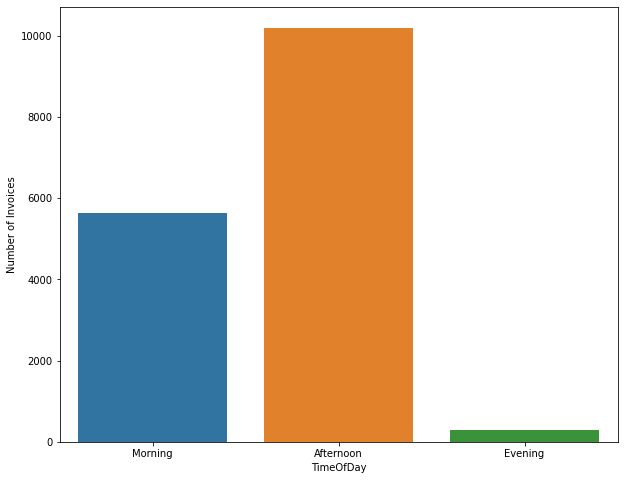

In [64]:
fig = plt.figure(figsize=(10,8)) 

ax = fig.add_subplot(111)
bytime = pd.DataFrame(time_df.groupby('TimeOfDay').size())
bytime.columns = ['Count']
bytime['index'] = [1,2,0]
bytime.sort_values(by='index', inplace=True)
bytime.reset_index(inplace=True)
sns.barplot(x="TimeOfDay", y="Count", data=bytime)
plt.ylabel('Number of Invoices')

plt.show()

In [65]:
data = data.merge(time_df, on='InvoiceNo', how='left')
data.drop(columns=['Count', 'InvoiceTime_x', 'InvoiceTime_y'], inplace=True)

### Exporting as CSV

In [67]:
data = data.to_csv('Online_Retail_Preprocessed_V2.csv', index=False)